# Reference
1. https://docs.opencv.org/3.4/d2/d2c/tutorial_sobel_derivatives.html
2. scale https://stackoverflow.com/questions/54849260/what-does-scale-mean-in-cv2-sobel

opencv 4.8.1
imread 1.46ms
GaussianBlur 0.27ms
cvtColor 0.05ms
sobel_x 0.10ms
sobel_y 0.09ms
convertScaleAbs_x 0.05ms
convertScaleAbs_y 0.05ms
addWeighted 0.16ms
total 0.80ms


0

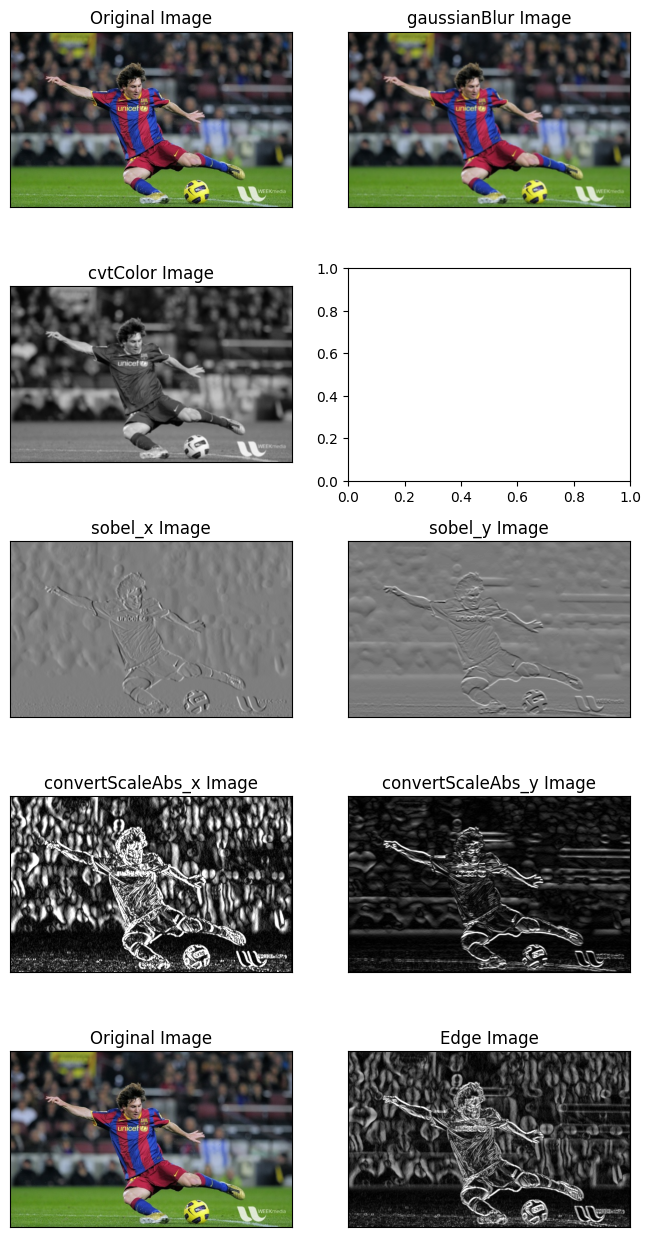

In [5]:
import cv2 as cv
print('opencv %s' % cv.getVersionString())
import time
from matplotlib import pyplot as plt

def print_time_spent(name, func):
    start_time = time.time()
    result = func()
    time_spent = time.time() - start_time
    print('%s %.2fms' % (name, time_spent * 1000))
    return result

def do_imread(filename):
    # Load the image
    src = cv.imread(filename, cv.IMREAD_COLOR)
    # Check if image is loaded fine
    if src is None:
        print ('Error opening image: ' + filename)
        return -1
    return src

def main(filename):
    src = print_time_spent(
        'imread',
        lambda: do_imread(filename)
    )

    total_start_time = time.time()

    gaussian_blur = print_time_spent(
        'GaussianBlur',
        lambda: cv.GaussianBlur(src, (3,3), 0)
    )
    
    gray = print_time_spent(
        'cvtColor',
        lambda: cv.cvtColor(gaussian_blur, cv.COLOR_BGR2GRAY)
    )
    
    scale = 1
    delta = 0
    ddepth = cv.CV_16S

    grad_x = print_time_spent(
        'sobel_x',
        lambda: cv.Sobel(gray, ddepth, 1, 0, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    )

    # Gradient-Y
    # grad_y = print_time_spent(
    #     'scharr_y',
    #     lambda: cv.Scharr(gray,ddepth,0,1)
    # )
    grad_y = print_time_spent(
        'sobel_y',
        lambda: cv.Sobel(gray, ddepth, 0, 1, ksize=3, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    )
    
    abs_grad_x = print_time_spent(
        'convertScaleAbs_x',
        lambda: cv.convertScaleAbs(grad_x)
    )

    abs_grad_y = print_time_spent(
        'convertScaleAbs_y',
        lambda: cv.convertScaleAbs(grad_y)
    )
    
    grad = print_time_spent(
        'addWeighted',
        lambda: cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
    )

    total_time_spent = time.time() - total_start_time
    print('total %.2fms' % (total_time_spent * 1000))

    plt.subplots(5, 2, figsize=(8,16))

    plt.subplot(5, 2, 1)
    plt.imshow(src[:,:,::-1])
    plt.title('Original Image')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(5, 2,2)
    plt.imshow(gaussian_blur[:,:,::-1])
    plt.title('gaussianBlur Image')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(5, 2, 3)
    plt.imshow(gray, cmap='gray')
    plt.title('cvtColor Image')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(5, 2, 5)
    plt.imshow(grad_x, cmap='gray')
    plt.title('sobel_x Image')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(5, 2, 6)
    plt.imshow(grad_y, cmap='gray')
    plt.title('sobel_y Image')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(5, 2, 7)
    plt.imshow(abs_grad_x, cmap='gray')
    plt.title('convertScaleAbs_x Image')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(5, 2, 8)
    plt.imshow(abs_grad_y, cmap='gray')
    plt.title('convertScaleAbs_y Image')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(5, 2, 9)
    plt.imshow(src[:,:,::-1])
    plt.title('Original Image')
    plt.xticks([])
    plt.yticks([])

    plt.subplot(5, 2, 10)
    plt.imshow(grad, cmap='gray')
    plt.title('Edge Image')
    plt.xticks([])
    plt.yticks([])
    
    return 0

main("messi5.jpg")

In [1]:
import cv2 as cv
print('opencv %s' % cv.getVersionString())
import time

use_scharr = False
current_ksize = 3
current_scale = 1
current_delta = 0
ddepth = cv.CV_16S

def do_imread(filename):
    # Load the image
    src = cv.imread(filename, cv.IMREAD_COLOR)
    # Check if image is loaded fine
    if src is None:
        print ('Error opening image: ' + filename)
        return -1
    return src

def calculate_time_spent(func):
    start_time = time.time()
    result = func()
    time_spent = time.time() - start_time

    return result, time_spent

title_window = 'Sobel Demo - Simple Edge Detector'
cv.namedWindow(title_window)

def update_window(ksize, scale, delta, ddepth):
    src, imread_time_spent = calculate_time_spent(
        lambda: do_imread('messi5.jpg')
    )

    total_start_time = time.time()

    gaussian_blur = cv.GaussianBlur(src, (3,3), 0)
    gray = cv.cvtColor(gaussian_blur, cv.COLOR_BGR2GRAY)
    
    grad_x = cv.Sobel(gray, ddepth, 1, 0, ksize=-1 if use_scharr else ksize, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)
    grad_y = cv.Sobel(gray, ddepth, 0, 1, ksize=-1 if use_scharr else ksize, scale=scale, delta=delta, borderType=cv.BORDER_DEFAULT)

    abs_grad_x = cv.convertScaleAbs(grad_x)
    abs_grad_y = cv.convertScaleAbs(grad_y)

    grad = cv.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

    total_time_spent = time.time() - total_start_time

    cv.putText(grad, 'imread %.2fms' % (imread_time_spent * 1000), (30, 30), cv.FONT_HERSHEY_COMPLEX, 0.5, (255, 255, 255), 1)
    cv.putText(grad, 'sobel %.2fms' % (total_time_spent * 1000), (30, 60), cv.FONT_HERSHEY_COMPLEX, 0.5, (255, 255, 255), 1)

    cv.imshow(title_window, grad)

def on_scharr(val):
    global use_scharr
    use_scharr = val
    update_window(
        ksize=current_ksize,
        scale=current_scale,
        delta=current_delta,
        ddepth=ddepth
    )

def on_ksize(val):
    if val % 2 == 0:
        return

    global current_ksize
    current_ksize = val
    update_window(
        ksize=current_ksize,
        scale=current_scale,
        delta=current_delta,
        ddepth=ddepth
    )

def on_scale(val):
    global current_scale
    current_scale = val
    update_window(
        ksize=current_ksize,
        scale=current_scale,
        delta=current_delta,
        ddepth=ddepth
    )

def on_delta(val):
    global current_delta
    current_delta = val
    update_window(
        ksize=current_ksize,
        scale=current_scale,
        delta=current_delta,
        ddepth=ddepth
    )

cv.createTrackbar('use scharr', title_window, use_scharr, 1, on_scharr)
cv.createTrackbar('ksize', title_window, current_ksize, 30, on_ksize)
cv.createTrackbar('scale', title_window, current_scale, 100, on_scale)
cv.createTrackbar('delta', title_window, current_delta, 100, on_delta)

cv.waitKey()

opencv 4.8.1


2024-01-01 20:16:11.776 Python[51736:1029063] WARNING: Secure coding is automatically enabled for restorable state! However, not on all supported macOS versions of this application. Opt-in to secure coding explicitly by implementing NSApplicationDelegate.applicationSupportsSecureRestorableState:.
